In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [2]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [3]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [4]:
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [5]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


# EDA (Exploring the training data)

In [6]:
y_train

225    0
856    1
620    0
450    0
423    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 668, dtype: int64

<BarContainer object of 2 artists>

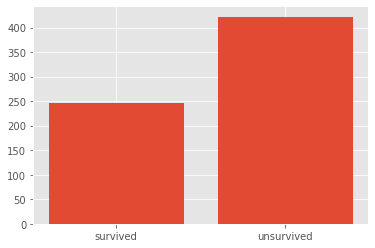

In [7]:
#with matplotlib
survived = sum(y_train == 1)
not_survived = sum(y_train == 0)
plt.bar(['survived','unsurvived'],[survived, not_survived])

<AxesSubplot:xlabel='Survived', ylabel='count'>

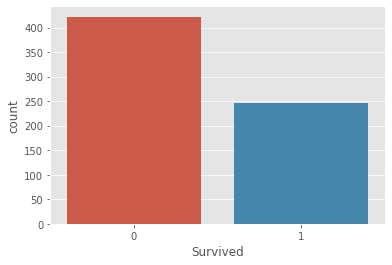

In [8]:
#with seaborn
sns.countplot(x= y_train)

In [9]:
df_calc = df_train.groupby(["Pclass", "Survived"]).count()
df_calc

Sex  Age  SibSp  Parch  Fare  Embarked
Pclass Survived                                        
1      0          66   52     66     66    66        66
       1         101   90    101    101   101       100
2      0          73   66     73     73    73        73
       1          65   62     65     65    65        65
3      0         283  204    283    283   283       283
       1          80   58     80     80    80        80

<AxesSubplot:xlabel='Survived', ylabel='count'>

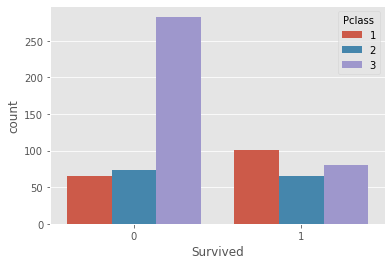

In [10]:
sns.countplot(x="Survived", data = df_train, hue = "Pclass")

<AxesSubplot:xlabel='Survived', ylabel='count'>

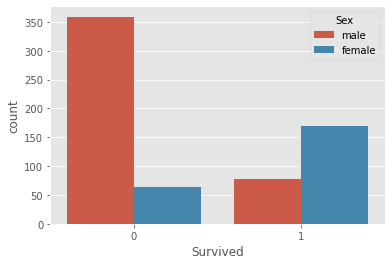

In [11]:
sns.countplot(x="Survived", data = df_train, hue = "Sex")

In [12]:
df_calc.index

MultiIndex([(1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['Pclass', 'Survived'])

In [13]:
df_calc.loc[(1,1)][0]

101

In [14]:
rate = (df_calc.loc[(1,1)][0])/((df_calc.loc[(1,0)][0])+ (df_calc.loc[(1,1)][0]))
rate

0.6047904191616766

<AxesSubplot:xlabel='Pclass', ylabel='count'>

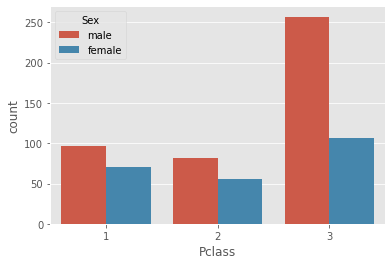

In [15]:
sns.countplot(x="Pclass", data = df_train, hue = "Sex")

<AxesSubplot:xlabel='Age', ylabel='Count'>

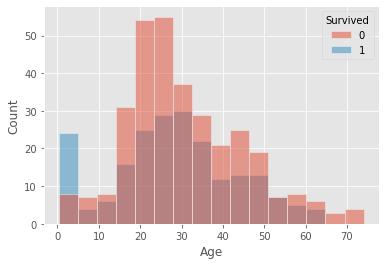

In [16]:
sns.histplot(data = df_train, x='Age', hue = 'Survived')

In [17]:
df_train[(df_train['Survived'] == 1)]['Age'].mean()

28.51547619047619

In [18]:
df_train[(df_train['Survived'] == 0)]['Age'].mean()

30.79192546583851

In [19]:
df_train['Age'].fillna(df_train['Age'].mean())

225    22.000000
856    45.000000
620    27.000000
450    36.000000
423    28.000000
         ...    
855    18.000000
871    47.000000
835    39.000000
792    29.893327
520    30.000000
Name: Age, Length: 668, dtype: float64

In [20]:
df_train.groupby(["Pclass", "Sex", "Survived"]).count()

Age  SibSp  Parch  Fare  Embarked
Pclass Sex    Survived                                   
1      female 0           3      3      3     3         3
              1          61     67     67    67        66
       male   0          49     63     63    63        63
              1          29     34     34    34        34
2      female 0           4      4      4     4         4
              1          50     52     52    52        52
       male   0          62     69     69    69        69
              1          12     13     13    13        13
3      female 0          42     56     56    56        56
              1          32     50     50    50        50
       male   0         162    227    227   227       227
              1          26     30     30    30        30

# Training a Logistic Regression classification model

## 1)Training models for Pclass

### 1-1) Initialise the baseline model for Pclass

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [22]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [23]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [24]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


In [25]:
m = DummyClassifier(strategy='most_frequent')
m

DummyClassifier(strategy='most_frequent')

In [26]:
X = df_train[['Pclass']]
y = df_train['Survived']

m.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [27]:
y_pred = m.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
y_pred_test = m.predict(x_test[['Pclass']])
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### 1-2) Logistic Regression for Pclass

In [29]:
X = df_train[['Pclass']]
y = df_train['Survived']

In [30]:
X.shape, y.shape

((668, 1), (668,))

In [31]:
y

225    0
856    1
620    0
450    0
423    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 668, dtype: int64

In [32]:
m = LogisticRegression(max_iter=1000)

In [33]:
m.fit(X,y)

LogisticRegression(max_iter=1000)

In [34]:
w_1 = m.coef_
w_0 = m.intercept_
print(f'Model feature coefficient :{w_1}\nModel intercept: {w_0}')

Model feature coefficient :[[-0.85405506]]
Model intercept: [1.36597673]


In [35]:
m.classes_

array([0, 1])

In [36]:
estimated_probabilities = m.predict_proba(X)
estimated_probabilities 

array([[0.76784604, 0.23215396],
       [0.37474315, 0.62525685],
       [0.76784604, 0.23215396],
       ...,
       [0.37474315, 0.62525685],
       [0.76784604, 0.23215396],
       [0.37474315, 0.62525685]])

In [37]:
pd.DataFrame(data=estimated_probabilities, columns=m.classes_)

,0,1
0,0.767846,0.232154
1,0.374743,0.625257
2,0.767846,0.232154
3,0.584709,0.415291
4,0.767846,0.232154
...,...,...
663,0.767846,0.232154
664,0.374743,0.625257
665,0.374743,0.625257
666,0.767846,0.232154


In [38]:
y_pred = m.predict(X)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
accuracy = m.score(X, y)
accuracy

0.6841317365269461

In [40]:
X.shape , x_test.shape

((668, 1), (223, 11))

In [41]:
X.head(4)

,Pclass
225,3
856,1
620,3
450,2


In [42]:
x_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
44,45,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
821,822,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
458,459,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S


In [43]:
m.score(x_test[['Pclass']], y_test)

0.6636771300448431

In [44]:
def sigmoid_function (x, w0, w1):
    y = 1/(1 + np.exp(-(w1*x + w0)))
    return y

In [45]:
s = sigmoid_function(X, w_0, w_1)
df_train['sigmoid'] = s

In [46]:
df_train.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,sigmoid
465,3,male,38.0,0,0,7.0500,S,0,0.232154
236,2,male,44.0,1,0,26.0000,S,0,0.415291
830,3,female,15.0,1,0,14.4542,C,1,0.232154
685,2,male,25.0,1,2,41.5792,C,0,0.415291
497,3,male,NaN,0,0,15.1000,S,0,0.232154
293,3,female,24.0,0,0,8.8500,S,0,0.232154
559,3,female,36.0,1,0,17.4000,S,1,0.232154
450,2,male,36.0,1,2,27.7500,S,0,0.415291
441,3,male,20.0,0,0,9.5000,S,0,0.232154
177,1,female,50.0,0,0,28.7125,C,0,0.625257


In [47]:
threshold = -w_0/w_1
threshold = threshold[0][0]
print(f'Pclass treshold = {round(threshold,2)} corresponding to p=0.5')

Pclass treshold = 1.6 corresponding to p=0.5


classify all points with a probability > 0.9 as positive.

How does the result of your prediction change?

How does it change if you change the threshold to > 0.1

In [48]:
estimated_probabilities = m.predict_proba(X)
estimated_probabilities 

array([[0.76784604, 0.23215396],
       [0.37474315, 0.62525685],
       [0.76784604, 0.23215396],
       ...,
       [0.37474315, 0.62525685],
       [0.76784604, 0.23215396],
       [0.37474315, 0.62525685]])

In [49]:
pd.DataFrame(data=estimated_probabilities, columns=m.classes_)

,0,1
0,0.767846,0.232154
1,0.374743,0.625257
2,0.767846,0.232154
3,0.584709,0.415291
4,0.767846,0.232154
...,...,...
663,0.767846,0.232154
664,0.374743,0.625257
665,0.374743,0.625257
666,0.767846,0.232154


In [50]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,sigmoid
225,3,male,22.0,0,0,9.3500,S,0,0.232154
856,1,female,45.0,1,1,164.8667,S,1,0.625257
620,3,male,27.0,1,0,14.4542,C,0,0.232154
450,2,male,36.0,1,2,27.7500,S,0,0.415291
423,3,female,28.0,1,1,14.4000,S,0,0.232154


In [51]:
df_train.reset_index(inplace = True)
df_train.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,sigmoid
0,225,3,male,22.0,0,0,9.3500,S,0,0.232154
1,856,1,female,45.0,1,1,164.8667,S,1,0.625257
2,620,3,male,27.0,1,0,14.4542,C,0,0.232154
3,450,2,male,36.0,1,2,27.7500,S,0,0.415291
4,423,3,female,28.0,1,1,14.4000,S,0,0.232154


In [52]:
df_train['survival_probability']= pd.DataFrame(data=estimated_probabilities, columns=m.classes_)[1]
df_train.head(4)

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,sigmoid,survival_probability
0,225,3,male,22.0,0,0,9.3500,S,0,0.232154,0.232154
1,856,1,female,45.0,1,1,164.8667,S,1,0.625257,0.625257
2,620,3,male,27.0,1,0,14.4542,C,0,0.232154,0.232154
3,450,2,male,36.0,1,2,27.7500,S,0,0.415291,0.415291


In [53]:
df_train.set_index('index', inplace = True)
df_train.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,sigmoid,survival_probability
index,,,,,,,,,,
225,3,male,22.0,0,0,9.3500,S,0,0.232154,0.232154
856,1,female,45.0,1,1,164.8667,S,1,0.625257,0.625257
620,3,male,27.0,1,0,14.4542,C,0,0.232154,0.232154
450,2,male,36.0,1,2,27.7500,S,0,0.415291,0.415291


In [54]:
df_train['0.9prob']=df_train['survival_probability'].apply(lambda x:1 if x>0.9 else 0)
df_train.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,sigmoid,survival_probability,0.9prob
index,,,,,,,,,,,
225,3,male,22.0,0,0,9.3500,S,0,0.232154,0.232154,0
856,1,female,45.0,1,1,164.8667,S,1,0.625257,0.625257,0
620,3,male,27.0,1,0,14.4542,C,0,0.232154,0.232154,0
450,2,male,36.0,1,2,27.7500,S,0,0.415291,0.415291,0


In [55]:
df_train['0.1prob']=df_train['survival_probability'].apply(lambda x:1 if x>0.1 else 0)
df_train.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,sigmoid,survival_probability,0.9prob,0.1prob
index,,,,,,,,,,,,
225,3,male,22.0,0,0,9.3500,S,0,0.232154,0.232154,0,1
856,1,female,45.0,1,1,164.8667,S,1,0.625257,0.625257,0,1
620,3,male,27.0,1,0,14.4542,C,0,0.232154,0.232154,0,1
450,2,male,36.0,1,2,27.7500,S,0,0.415291,0.415291,0,1


In [56]:
score_90prob = ((df_train['Survived']==df_train['0.9prob']).sum()) / len(df_train.index)
score_90prob

0.6317365269461078

In [57]:
score_10prob = ((df_train['Survived']==df_train['0.1prob']).sum()) / len(df_train.index)
score_10prob

0.36826347305389223

In [58]:
accuracy_50prob = accuracy
accuracy_50prob 

0.6841317365269461

I can see that the threshold for p = 0.5 has the highest probability for correct prediction.

## 2) Logistic Regression for Age

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [60]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [61]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [62]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


In [63]:
df_train[df_train['Age'].isna()] 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
650,3,male,NaN,0,0,7.8958,S,0
413,2,male,NaN,0,0,0.0000,S,0
793,1,male,NaN,0,0,30.6958,C,0
420,3,male,NaN,0,0,7.8958,C,0
602,1,male,NaN,0,0,42.4000,S,0
...,...,...,...,...,...,...,...,...
667,3,male,NaN,0,0,7.7750,S,0
507,1,male,NaN,0,0,26.5500,S,1
738,3,male,NaN,0,0,7.8958,S,0
578,3,female,NaN,1,0,14.4583,C,0


In [64]:
age = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(age)

In [65]:
df_train[df_train['Age'].isna()] 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [66]:
X = df_train[['Age']]
y = df_train['Survived']

In [67]:
X.shape , y.shape

((668, 1), (668,))

In [68]:
y

225    0
856    1
620    0
450    0
423    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 668, dtype: int64

In [69]:
m = LogisticRegression()

In [70]:
m.fit(X,y)

LogisticRegression()

In [71]:
y_pred = m.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
m.score(X,y)

0.6317365269461078

In [73]:
x_test['Age'] = x_test['Age'].fillna(df_train['Age'].median())

In [74]:
m.score(x_test[['Age']], y_test)

0.5695067264573991

<AxesSubplot:xlabel='Age', ylabel='Survived'>

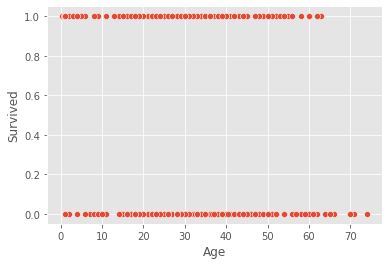

In [75]:
# Plot the two classes
sns.scatterplot(x=df_train['Age'], y= df_train["Survived"])


3) Logistic Regression for Age and Fare

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [77]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [78]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [79]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


In [80]:
df_train[df_train['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [81]:
df_train['Age']= df_train['Age'].fillna(df_train['Age'].mean())

In [82]:
df_train[df_train['Age'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [83]:
X = df_train [['Age', 'Fare']]
y = df_train['Survived']
m = LogisticRegression()
m.fit(X, y)

LogisticRegression()

In [84]:
y_pred = m.predict(X)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
x_test[['Age','Fare']] = x_test[['Age','Fare']].fillna({'Age': df_train['Age'].mean(), 
                                                      'Fare':df_train['Fare'].mean()})
x_test[['Age','Fare']].isna()

,Age,Fare
205,False,False
44,False,False
821,False,False
458,False,False
795,False,False
...,...,...
153,False,False
288,False,False
244,False,False
680,False,False


In [86]:
m.score(X,y) , m.score(x_test[['Age','Fare']], y_test)

(0.6721556886227545, 0.6143497757847534)

# Feature Engineering

# Creating features using one-hot encoding

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [88]:
full_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [89]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [91]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [92]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


In [93]:
df_train[df_train['Sex'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [94]:
pd.get_dummies(df_train['Sex'])

,female,male
225,0,1
856,1,0
620,0,1
450,0,1
423,1,0
...,...,...
855,1,0
871,1,0
835,1,0
792,1,0


In [95]:
df_train['female'] = pd.get_dummies(df_train['Sex'])['female']
df_train['male'] = pd.get_dummies(df_train['Sex'])['male']
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,female,male
225,3,male,22.0,0,0,9.3500,S,0,0,1
856,1,female,45.0,1,1,164.8667,S,1,1,0
620,3,male,27.0,1,0,14.4542,C,0,0,1
450,2,male,36.0,1,2,27.7500,S,0,0,1
423,3,female,28.0,1,1,14.4000,S,0,1,0


In [96]:
df_train = df_train.drop('Sex', axis = 1)
df_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,female,male
225,3,22.0,0,0,9.3500,S,0,0,1
856,1,45.0,1,1,164.8667,S,1,1,0
620,3,27.0,1,0,14.4542,C,0,0,1
450,2,36.0,1,2,27.7500,S,0,0,1
423,3,28.0,1,1,14.4000,S,0,1,0


In [97]:
X = df_train[['female','male']]
y = df_train['Survived']

In [98]:
X.shape , y.shape

((668, 2), (668,))

In [99]:
y

225    0
856    1
620    0
450    0
423    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 668, dtype: int64

In [100]:
m = LogisticRegression()

In [101]:
m.fit(X,y)

LogisticRegression()

In [102]:
y_pred = m.predict(X)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [103]:
m.score(X,y)

0.7904191616766467

In [104]:
x_test = x_test.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
205,3,female,2.0,0,1,10.4625,S
44,3,female,19.0,0,0,7.8792,Q
821,3,male,27.0,0,0,8.6625,S
458,2,female,50.0,0,0,10.5000,S
795,2,male,39.0,0,0,13.0000,S


In [105]:
x_test[x_test['Sex'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [106]:
pd.get_dummies(x_test['Sex'])

x_test['female'] = pd.get_dummies(x_test['Sex'])['female']
x_test['male'] = pd.get_dummies(x_test['Sex'])['male']
x_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
205,3,female,2.0,0,1,10.4625,S,1,0
44,3,female,19.0,0,0,7.8792,Q,1,0
821,3,male,27.0,0,0,8.6625,S,0,1
458,2,female,50.0,0,0,10.5000,S,1,0
795,2,male,39.0,0,0,13.0000,S,0,1


In [107]:
x_test = x_test.drop('Sex', axis = 1)
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
205,3,2.0,0,1,10.4625,S,1,0
44,3,19.0,0,0,7.8792,Q,1,0
821,3,27.0,0,0,8.6625,S,0,1
458,2,50.0,0,0,10.5000,S,1,0
795,2,39.0,0,0,13.0000,S,0,1


In [108]:
m.score(X,y)

0.7904191616766467

In [109]:
m.score(x_test[['female','male']],y_test)

0.7757847533632287

# RobustScaler

In [110]:
df_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,female,male
225,3,22.0,0,0,9.3500,S,0,0,1
856,1,45.0,1,1,164.8667,S,1,1,0
620,3,27.0,1,0,14.4542,C,0,0,1
450,2,36.0,1,2,27.7500,S,0,0,1
423,3,28.0,1,1,14.4000,S,0,1,0


Logistic regression model on age and scaled fare

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [112]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [113]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [114]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


In [115]:
df_train[df_train['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [116]:
df_train['Age']= df_train['Age'].fillna(df_train['Age'].mean())

In [117]:
df_train[df_train['Age'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [118]:
X = df_train [['Age', 'Fare']]
y = df_train['Survived']

In [119]:
robust = RobustScaler()
robust.fit(X[['Fare']])
fare_robust = robust.transform(X[['Fare']])

In [120]:
df_train['fare_robust'] = fare_robust
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,fare_robust
225,3,male,22.0,0,0,9.3500,S,0,-0.218322
856,1,female,45.0,1,1,164.8667,S,1,6.433603
620,3,male,27.0,1,0,14.4542,C,0,0.000000
450,2,male,36.0,1,2,27.7500,S,0,0.568702
423,3,female,28.0,1,1,14.4000,S,0,-0.002318


In [121]:
X = df_train [['Age', 'fare_robust']]
y = df_train['Survived']

In [122]:
m = LogisticRegression()
m.fit(X, y)

LogisticRegression()

In [123]:
y_pred = m.predict(X)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
x_test.shape

(223, 11)

In [125]:
x_test[['Age','Fare']] = x_test[['Age','Fare']].fillna({'Age': df_train['Age'].mean(), 
                                                      'Fare':df_train['Fare'].mean()})
x_test[['Age','Fare']].isna()

,Age,Fare
205,False,False
44,False,False
821,False,False
458,False,False
795,False,False
...,...,...
153,False,False
288,False,False
244,False,False
680,False,False


In [126]:
robust = RobustScaler()
robust.fit(x_test[['Fare']])
fare_robust = robust.transform(x_test[['Fare']])

In [127]:
fare_robust.shape

(223, 1)

In [128]:
x_test.shape

(223, 11)

In [129]:
x_test['fare_robust'] = fare_robust
# x_test.drop(columns = 'Fare')
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_robust
205,206,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,-0.181010
44,45,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,-0.298034
821,822,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S,-0.262550
458,459,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,-0.179311
795,796,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,-0.066061


In [130]:
x_test = x_test [['Age', 'fare_robust']]

In [131]:
m.score(X,y)

0.6721556886227545

In [132]:
m.score(x_test[['Age','fare_robust']], y_test)

0.6143497757847534

result for data with out scaling (0.67 , 0.61) We can see that scaling the fare didn't help at all :D

# Random forest classification

## 1) Decision tree (Age and Fare)

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

plt.style.use('ggplot')
# plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

In [134]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [135]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [136]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


In [137]:
df_train[df_train['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [138]:
df_train['Age']= df_train['Age'].fillna(df_train['Age'].mean())

In [139]:
df_train[df_train['Age'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


<AxesSubplot:xlabel='Age', ylabel='Fare'>

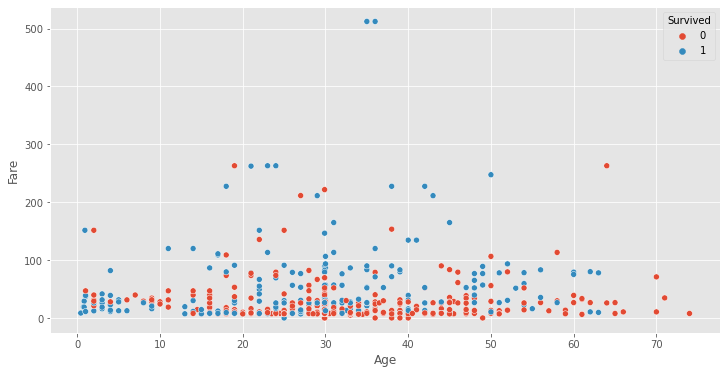

In [140]:
X = df_train[['Age', 'Fare']]
y = df_train["Survived"]

sns.scatterplot(x=X["Age"], y=X["Fare"], hue=y)

In [141]:
m_dt = DecisionTreeClassifier(max_depth=2)
m_dt.fit(X, y)
ypred = m_dt.predict(X)
ypred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
m_dt.score(X, y)

0.7035928143712575

In [143]:
x_test[['Age','Fare']] = x_test[['Age','Fare']].fillna({'Age': df_train['Age'].mean(), 
                                                      'Fare':df_train['Fare'].mean()})
m_dt.score(x_test[['Age','Fare']], y_test)

0.6322869955156951

Result show that decision tree here is a sligtly better option because the score for logisitic regression was around 67% for trained data and 61% for test data

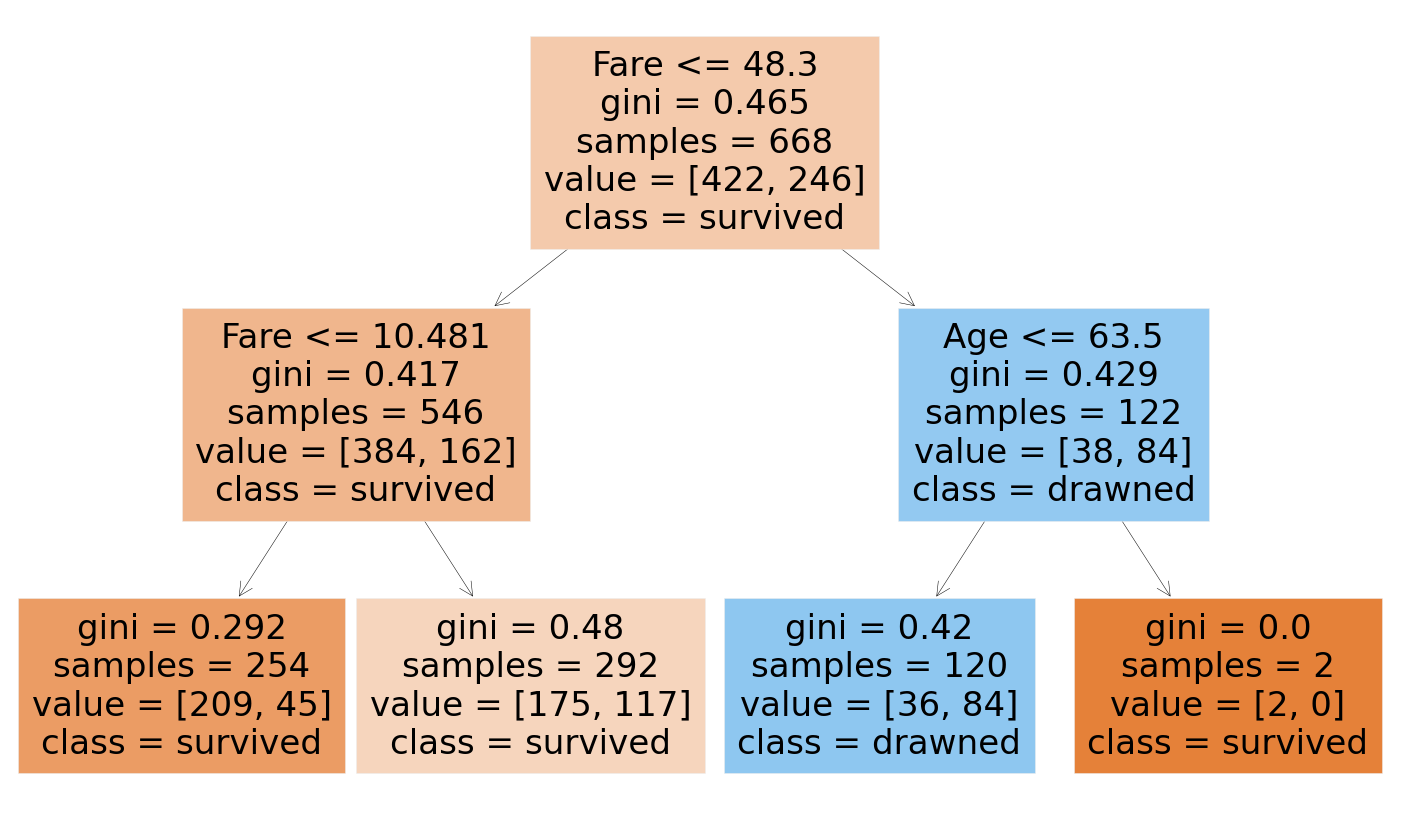

In [144]:
plt.figure(figsize=(25,15))
t = plot_tree(m_dt, feature_names=['Age', "Fare"], 
              class_names=['survived', 'drawned'], filled=True)

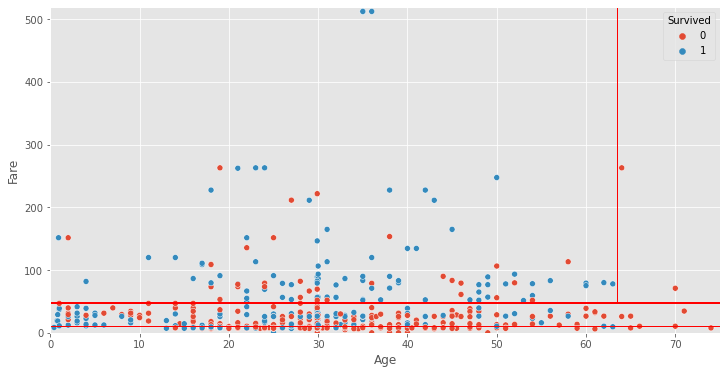

In [145]:
sns.scatterplot(x=X["Age"], y=X["Fare"], hue=y_train)
plt.axis((0, 75, 0, 520))

# these are the parts that can be added to the plot later to illustrate the Decision Tree:
plt.plot([0, 75],[48.3,48.3], linewidth=2, color="red") #horizontal
plt.plot([63.5, 63.5],[48.3, 520], linewidth=1, color="red") #top
plt.plot([0, 75],[10.481, 10.481], linewidth=1, color="red") #top

## 2) Random forest (Age and Fare)

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

plt.style.use('ggplot')
# plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

In [147]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [148]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [149]:
df_train = df_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
225,3,male,22.0,0,0,9.3500,S,0
856,1,female,45.0,1,1,164.8667,S,1
620,3,male,27.0,1,0,14.4542,C,0
450,2,male,36.0,1,2,27.7500,S,0
423,3,female,28.0,1,1,14.4000,S,0


In [150]:
df_train[df_train['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [151]:
df_train['Age']= df_train['Age'].fillna(df_train['Age'].mean())

In [152]:
df_train[df_train['Age'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [153]:
X = df_train[['Age', 'Fare']]
y = df_train["Survived"]

In [154]:
m_rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=2)
m_rf.fit(X,y)

RandomForestClassifier(max_depth=4, max_features=2)

In [155]:
m_rf.score(X,y)

0.7425149700598802

In [156]:
x_test[['Age','Fare']] = x_test[['Age','Fare']].fillna({'Age': df_train['Age'].mean(), 
                                                      'Fare':df_train['Fare'].mean()})
m_rf.score(x_test[['Age','Fare']], y_test)

0.6547085201793722

Evaluating the model with accuracy, precision, recall and F1 metrics

In [157]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

ypred = m_rf.predict(X)
ypred.shape


(668,)

In [158]:
y = df_train["Survived"]
y.shape

(668,)

In [159]:
acc_sc = accuracy_score(y, ypred)
prec_sc = precision_score(y,ypred)
rec_sc = recall_score(y,ypred)
f_sc = f1_score(y,ypred)

print(f"""accuracy = {round(acc_sc,2)} \n
precision = {round(prec_sc,2)} \n 
recall = {round(rec_sc,2)}\n
f1 = {round(f_sc,2)}""")

accuracy = 0.74 

precision = 0.78 
 
recall = 0.42

f1 = 0.55


my model is exact but not inclusive :(
I guess that means I have a lot of FN. Lets check it with confusion matrix:

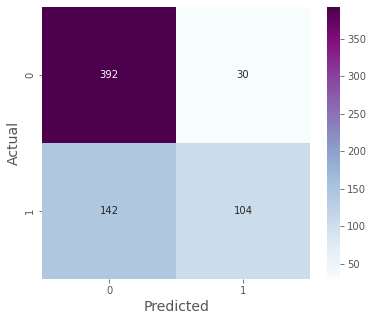

In [160]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y, ypred)
def plot_heatmap(confusion):
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion,
                xticklabels = np.unique(y),
                yticklabels = np.unique(y),
                cmap = 'BuPu',
                annot=True,
                fmt='g'
                )
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize = 14)

plot_heatmap(conf)

* comparing LogisticRegression model with different features

Text(0.5, 1.0, 'Analysing differen features for LogisticRegression model')

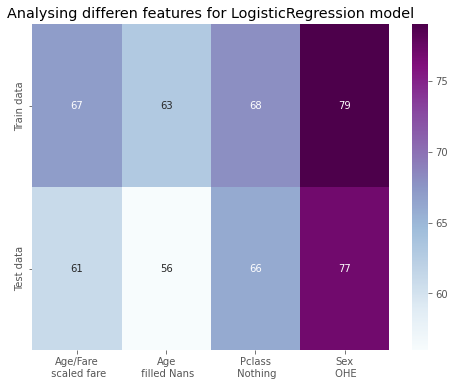

In [189]:
data = [[67, 63, 68, 79], [61, 56, 66, 77]]
plt.rcParams['figure.figsize'] = (8, 6)
p = sns.heatmap(data, 
            cmap='BuPu', 
            annot=True, fmt='g',
            linewidths=0, linecolor='white',
            xticklabels= ['Age/Fare\n scaled fare', 'Age\n filled Nans', 'Pclass\n Nothing', 'Sex\n OHE'], 
            yticklabels=['Train data', 'Test data'], 
            )
p.set_title("Analysing differen features for LogisticRegression model")

---> overfitting for Age only + Fare/Age


* Comparing different models:

Text(0.5, 1.0, 'Differen models on Age/Fare with filled Nans')

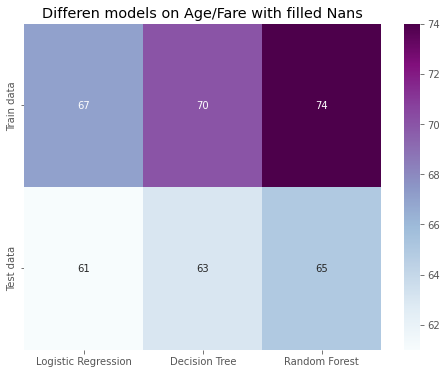

In [161]:
data = [[67, 70,74], [61, 63, 65]]
plt.rcParams['figure.figsize'] = (8, 6)
p = sns.heatmap(data, 
            cmap='BuPu', 
            annot=True, fmt='g',
            linewidths=0, linecolor='white',
            xticklabels= ['Logistic Regression', 'Decision Tree', 'Random Forest'], 
            yticklabels=['Train data', 'Test data'], 
            )
p.set_title("Differen models on Age/Fare with filled Nans")

--> Of course we get also overfitting with decision tree and random forest

# Give the models more features
## Trying the feature engineering with column transformers and pipeline

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# The Transformers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

# Evaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

In [164]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [165]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [166]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [167]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [168]:
x_train = x_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
225,3,male,22.0,0,0,9.3500,S
856,1,female,45.0,1,1,164.8667,S
620,3,male,27.0,1,0,14.4542,C
450,2,male,36.0,1,2,27.7500,S
423,3,female,28.0,1,1,14.4000,S


In [169]:
x_train['Family'] = x_train['SibSp'] + x_train['Parch']
x_train = x_train.drop(columns = ['SibSp', 'Parch'])
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family
225,3,male,22.0,9.3500,S,0
856,1,female,45.0,164.8667,S,2
620,3,male,27.0,14.4542,C,1
450,2,male,36.0,27.7500,S,3
423,3,female,28.0,14.4000,S,2


In [170]:
y_train.info

<bound method Series.info of 225    0
856    1
620    0
450    0
423    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 668, dtype: int64>

In [171]:
num_col = ['Age', 'Family', 'Fare']
cat_col = ['Pclass', 'Sex', 'Embarked']

In [172]:
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
     ('cat_ohe', OneHotEncoder(drop='first'))
])
    
cat_pipeline

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_ohe', OneHotEncoder(drop='first'))])

In [173]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scale',RobustScaler())
])

num_pipeline

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('num_scale', RobustScaler())])

In [174]:
my_column_transformer = ColumnTransformer([
    ("categorical pipeline",cat_pipeline, cat_col),
    ("numerical pipeline", num_pipeline, num_col),
])

my_column_transformer 

ColumnTransformer(transformers=[('categorical pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Pclass', 'Sex', 'Embarked']),
                                ('numerical pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_scale',
                                                  RobustScaler())]),
                                 ['Age', 'Family', 'Fare'])])

In [175]:
x_train

,Pclass,Sex,Age,Fare,Embarked,Family
225,3,male,22.0,9.3500,S,0
856,1,female,45.0,164.8667,S,2
620,3,male,27.0,14.4542,C,1
450,2,male,36.0,27.7500,S,3
423,3,female,28.0,14.4000,S,2
...,...,...,...,...,...,...
855,3,female,18.0,9.3500,S,1
871,1,female,47.0,52.5542,S,2
835,1,female,39.0,83.1583,C,2
792,3,female,NaN,69.5500,S,10


In [176]:
Xtrain_fe= my_column_transformer.fit_transform(x_train)

In [177]:
Xtrain_fe

array([[ 0.        ,  1.        ,  1.        , ..., -0.46153846,
         0.        , -0.21832227],
       [ 0.        ,  0.        ,  0.        , ...,  1.30769231,
         2.        ,  6.43360337],
       [ 0.        ,  1.        ,  1.        , ..., -0.07692308,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.84615385,
         2.        ,  2.93868481],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        10.        ,  2.35661614],
       [ 0.        ,  0.        ,  0.        , ...,  0.15384615,
         0.        ,  3.381031  ]])

In [178]:
x_test = x_test.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket'])
x_test['Family'] = x_test['SibSp'] + x_test['Parch']
x_test = x_test.drop(columns = ['SibSp', 'Parch'])
x_test.head()

,Pclass,Sex,Age,Fare,Embarked,Family
205,3,female,2.0,10.4625,S,1
44,3,female,19.0,7.8792,Q,0
821,3,male,27.0,8.6625,S,0
458,2,female,50.0,10.5000,S,0
795,2,male,39.0,13.0000,S,0


In [179]:
Xtest_fe= my_column_transformer.transform(x_test)
Xtest_fe

array([[ 0.        ,  1.        ,  0.        , ..., -2.        ,
         1.        , -0.17073724],
       [ 0.        ,  1.        ,  0.        , ..., -0.69230769,
         0.        , -0.28123289],
       [ 0.        ,  1.        ,  1.        , ..., -0.07692308,
         0.        , -0.24772875],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.15384615,
         0.        , -0.30921503],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.27018461],
       [ 0.        ,  0.        ,  0.        , ...,  1.61538462,
         0.        ,  0.4908209 ]])

In [180]:
x_train.shape , y_train.shape

((668, 6), (668,))

In [181]:
m_lr = LogisticRegression()
m_lr.fit(Xtrain_fe, y_train)
y_pred_lr = m_lr.predict(Xtrain_fe)
y_pred_lr

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [182]:
# LogisticRegression model
m_lr = LogisticRegression()
m_lr.fit(Xtrain_fe, y_train)
y_pred_lr = m_lr.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_lr = accuracy_score(y_train, y_pred_lr)
prec_sc_lr = precision_score(y_train,y_pred_lr, zero_division = 0)
rec_sc_lr = recall_score(y_train,y_pred_lr)
f_sc_lr = f1_score(y_train,y_pred_lr, zero_division = 0)


# Evaluation with test data
test_sc_lr = m_lr.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_lr,2)} \n
precision = {round(prec_sc_lr,2)} \n 
recall = {round(rec_sc_lr,2)}\n
f1 = {round(f_sc_lr,2)} \n
test_data = {round(test_sc_lr,2)} \n""")

accuracy = 0.82 

precision = 0.79 
 
recall = 0.68

f1 = 0.73 

test_data = 0.78 



In [183]:
y_pred_lr

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

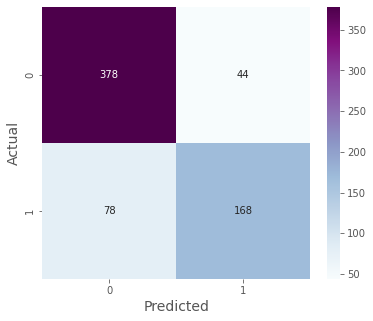

In [184]:
from sklearn.metrics import confusion_matrix

m_lr = LogisticRegression()
m_lr.fit(Xtrain_fe, y_train)
y_pred_lr = m_lr.predict(Xtrain_fe)

conf = confusion_matrix(y_train, y_pred_lr)

def plot_heatmap(confusion):
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion,
                xticklabels = np.unique(y),
                yticklabels = np.unique(y),
                cmap = 'BuPu',
                annot=True,
                fmt='g'
                )
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize = 14)

plot_heatmap(conf)

In [185]:
prec_sc_lr = precision_score(y_train,y_pred_lr)
prec_sc_lr 

0.7924528301886793

In [186]:
# DesisionTree model
m_dt = DecisionTreeClassifier()
m_dt.fit(Xtrain_fe, y_train)
y_pred_dt = m_dt.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_dt = accuracy_score(y_train, y_pred_dt)
prec_sc_dt = precision_score(y_train,y_pred_dt)
rec_sc_dt = recall_score(y_train,y_pred_dt)
f_sc_dt = f1_score(y_train,y_pred_dt)


# Evaluation with test data
test_sc_dt = m_dt.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_dt,2)} \n
precision = {round(prec_sc_dt,2)} \n 
recall = {round(rec_sc_dt,2)}\n
f1 = {round(f_sc_dt,2)} \n
test_data = {round(test_sc_dt,2)} \n""")

accuracy = 0.98 

precision = 1.0 
 
recall = 0.96

f1 = 0.98 

test_data = 0.78 



In [187]:
# RandomForest model
m_rf = RandomForestClassifier()
m_rf.fit(Xtrain_fe, y_train)
y_pred_rf = m_rf.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_rf = accuracy_score(y_train, y_pred_rf)
prec_sc_rf = precision_score(y_train,y_pred_rf)
rec_sc_rf = recall_score(y_train,y_pred_rf)
f_sc_rf = f1_score(y_train,y_pred_rf)


# Evaluation with test data
test_sc_rf = m_rf.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_rf,2)} \n
precision = {round(prec_sc_rf,2)} \n 
recall = {round(rec_sc_rf,2)}\n
f1 = {round(f_sc_rf,2)} \n
test_data = {round(test_sc_rf,2)} \n""")

accuracy = 0.98 

precision = 0.98 
 
recall = 0.98

f1 = 0.98 

test_data = 0.82 



##                                          More Features

### Six features: 
'Age', 'Family'(sum of SibSp & Parch), 'Fare','Pclass', 'Sex', 'Embarked'

### Feature engineering:
num_col = ['Age', 'Family', 'Fare']       num --> 1)fill NaNs 2) scaling with Robust

cat_col = ['Pclass', 'Sex', 'Embarked']   cat --> 1)fill NaNs 2) OHE


Text(0.5, 1.0, 'Differen models on 6 Features')

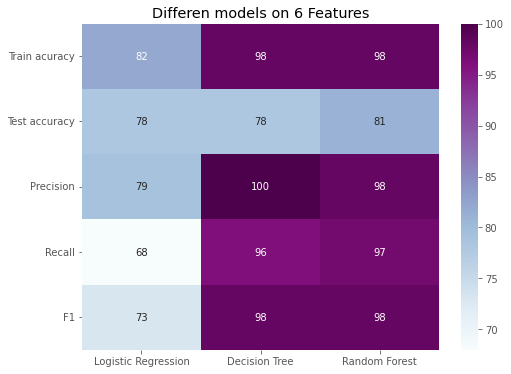

In [188]:
data = [[82, 98, 98], [78, 78, 81],[79, 100, 98],[68, 96, 97],[73, 98, 98]]
plt.rcParams['figure.figsize'] = (8, 6)
p = sns.heatmap(data, 
            cmap='BuPu', 
            annot=True, fmt='g',
            linewidths=0, linecolor='white',
            xticklabels= ['Logistic Regression', 'Decision Tree', 'Random Forest'], 
            yticklabels=['Train acuracy', 'Test accuracy', 'Precision', 'Recall', 'F1'], 
            )
p.set_title("Differen models on 6 Features")

* High overfit for DT and RF
* good results for LR

## Decrease the overfitting with choosing some of the features:

* keep Pclass and Sex --> no overfitting in fitting LR on one feature
* Get rid of Age --> predicting only zeros in fitting LR on one feature
* Get rid of Embarked -->  I think its influence is less than other features
* Consider Pclass as numerical this time

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# The Transformers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

# Evaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

In [328]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [329]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [330]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [331]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [332]:
x_train = x_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket','Embarked', 'Age'])
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare
225,3,male,0,0,9.3500
856,1,female,1,1,164.8667
620,3,male,1,0,14.4542
450,2,male,1,2,27.7500
423,3,female,1,1,14.4000


In [333]:
x_train['Family'] = x_train['SibSp'] + x_train['Parch']
x_train = x_train.drop(columns = ['SibSp', 'Parch'])
x_train.head()

,Pclass,Sex,Fare,Family
225,3,male,9.3500,0
856,1,female,164.8667,2
620,3,male,14.4542,1
450,2,male,27.7500,3
423,3,female,14.4000,2


In [334]:
y_train.info

<bound method Series.info of 225    0
856    1
620    0
450    0
423    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 668, dtype: int64>

In [335]:
num_col = ['Family', 'Fare', 'Pclass']
cat_col = ['Sex']

In [336]:
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
     ('cat_ohe', OneHotEncoder(drop='first'))
])
    
cat_pipeline

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_ohe', OneHotEncoder(drop='first'))])

In [337]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scale',RobustScaler())
])

num_pipeline

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('num_scale', RobustScaler())])

In [338]:
my_column_transformer = ColumnTransformer([
    ("categorical pipeline",cat_pipeline, cat_col),
    ("numerical pipeline", num_pipeline, num_col),
])

my_column_transformer 

ColumnTransformer(transformers=[('categorical pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Sex']),
                                ('numerical pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_scale',
                                                  RobustScaler())]),
                                 ['Family', 'Fare', 'Pclass'])])

In [339]:
x_train

,Pclass,Sex,Fare,Family
225,3,male,9.3500,0
856,1,female,164.8667,2
620,3,male,14.4542,1
450,2,male,27.7500,3
423,3,female,14.4000,2
...,...,...,...,...
855,3,female,9.3500,1
871,1,female,52.5542,2
835,1,female,83.1583,2
792,3,female,69.5500,10


In [340]:
Xtrain_fe= my_column_transformer.fit_transform(x_train)

In [341]:
Xtrain_fe

array([[ 1.        ,  0.        , -0.21832227,  0.        ],
       [ 0.        ,  2.        ,  6.43360337, -1.6       ],
       [ 1.        ,  1.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  2.        ,  2.93868481, -1.6       ],
       [ 0.        , 10.        ,  2.35661614,  0.        ],
       [ 0.        ,  0.        ,  3.381031  , -1.6       ]])

In [342]:
x_test = x_test.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket','Embarked', 'Age'])
x_test['Family'] = x_test['SibSp'] + x_test['Parch']
x_test = x_test.drop(columns = ['SibSp', 'Parch'])
x_test.head()

,Pclass,Sex,Fare,Family
205,3,female,10.4625,1
44,3,female,7.8792,0
821,3,male,8.6625,0
458,2,female,10.5000,0
795,2,male,13.0000,0


In [343]:
Xtest_fe= my_column_transformer.transform(x_test)
Xtest_fe

array([[ 0.00000000e+00,  1.00000000e+00, -1.70737237e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.81232891e-01,
         0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -2.47728750e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.69133247e-01,
        -8.00000000e-01],
       [ 1.00000000e+00,  0.00000000e+00, -6.22005886e-02,
        -8.00000000e-01],
       [ 1.00000000e+00,  1.00000000e+00,  9.96897242e+00,
        -1.60000000e+00],
       [ 1.00000000e+00,  2.00000000e+00,  2.46300130e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  7.00000000e+00,  1.38780626e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.18320131e+00,
        -1.60000000e+00],
       [ 0.00000000e+00,  4.00000000e+00,  4.71038359e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  8.42130184e+00,
        -1.60000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -3.08145702e-01,
      

In [344]:
x_train.shape , y_train.shape

((668, 4), (668,))

In [345]:
m_lr = LogisticRegression()
m_lr.fit(Xtrain_fe, y_train)
y_pred_lr = m_lr.predict(Xtrain_fe)
y_pred_lr

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [346]:
# LogisticRegression model
m_lr = LogisticRegression()
m_lr.fit(Xtrain_fe, y_train)
y_pred_lr = m_lr.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_lr = accuracy_score(y_train, y_pred_lr)
prec_sc_lr = precision_score(y_train,y_pred_lr, zero_division = 0)
rec_sc_lr = recall_score(y_train,y_pred_lr)
f_sc_lr = f1_score(y_train,y_pred_lr, zero_division = 0)


# Evaluation with test data
test_sc_lr = m_lr.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_lr,2)} \n
precision = {round(prec_sc_lr,2)} \n 
recall = {round(rec_sc_lr,2)}\n
f1 = {round(f_sc_lr,2)} \n
test_data = {round(test_sc_lr,2)} \n""")

accuracy = 0.81 

precision = 0.78 
 
recall = 0.69

f1 = 0.73 

test_data = 0.78 



In [347]:
# DesisionTree model
m_dt = DecisionTreeClassifier()
m_dt.fit(Xtrain_fe, y_train)
y_pred_dt = m_dt.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_dt = accuracy_score(y_train, y_pred_dt)
prec_sc_dt = precision_score(y_train,y_pred_dt)
rec_sc_dt = recall_score(y_train,y_pred_dt)
f_sc_dt = f1_score(y_train,y_pred_dt)


# Evaluation with test data
test_sc_dt = m_dt.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_dt,2)} \n
precision = {round(prec_sc_dt,2)} \n 
recall = {round(rec_sc_dt,2)}\n
f1 = {round(f_sc_dt,2)} \n
test_data = {round(test_sc_dt,2)} \n""")

accuracy = 0.93 

precision = 0.95 
 
recall = 0.84

f1 = 0.89 

test_data = 0.79 



In [348]:
# RandomForest model
m_rf = RandomForestClassifier()
m_rf.fit(Xtrain_fe, y_train)
y_pred_rf = m_rf.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_rf = accuracy_score(y_train, y_pred_rf)
prec_sc_rf = precision_score(y_train,y_pred_rf)
rec_sc_rf = recall_score(y_train,y_pred_rf)
f_sc_rf = f1_score(y_train,y_pred_rf)


# Evaluation with test data
test_sc_rf = m_rf.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_rf,2)} \n
precision = {round(prec_sc_rf,2)} \n 
recall = {round(rec_sc_rf,2)}\n
f1 = {round(f_sc_rf,2)} \n
test_data = {round(test_sc_rf,2)} \n""")

accuracy = 0.93 

precision = 0.93 
 
recall = 0.86

f1 = 0.89 

test_data = 0.79 



In [352]:
# SVM model

m_svm = SVC(C = 0.0000001)
m_svm.fit(Xtrain_fe, y_train)
y_pred_svm = m_svm.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_svm = accuracy_score(y_train, y_pred_rf)
prec_sc_svm = precision_score(y_train,y_pred_rf)
rec_sc_svm = recall_score(y_train,y_pred_rf)
f_sc_svm = f1_score(y_train,y_pred_rf)


# Evaluation with test data
test_sc_svm = m_svm.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_svm,2)} \n
precision = {round(prec_sc_svm,2)} \n 
recall = {round(rec_sc_svm,2)}\n
f1 = {round(f_sc_svm,2)} \n
test_data = {round(test_sc_svm,2)} \n""")

accuracy = 0.93 

precision = 0.93 
 
recall = 0.86

f1 = 0.89 

test_data = 0.57 



### Four features: 
'Family'(sum of SibSp & Parch), 'Fare','Pclass', 'Sex'

### Feature engineering:
num_col = ['Pclass', 'Family', 'Fare']       num --> 1)fill NaNs 2) scaling with Robust

cat_col = ['Sex']   cat --> 1)fill NaNs 2) OHE

Text(0.5, 1.0, 'Differen models on 4 Features')

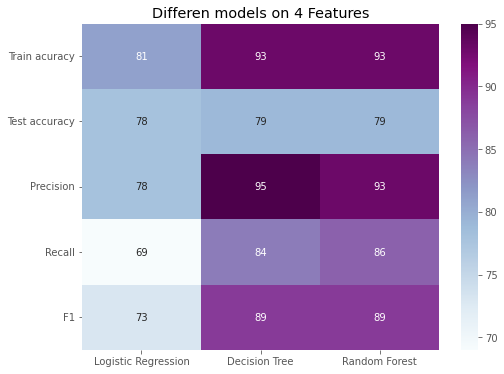

In [324]:
data = [[81, 93, 93], [78, 79, 79],[78, 95, 93],[69, 84, 86],[73, 89, 89]]
plt.rcParams['figure.figsize'] = (8, 6)
p = sns.heatmap(data, 
            cmap='BuPu', 
            annot=True, fmt='g',
            linewidths=0, linecolor='white',
            xticklabels= ['Logistic Regression', 'Decision Tree', 'Random Forest'], 
            yticklabels=['Train acuracy', 'Test accuracy', 'Precision', 'Recall', 'F1'], 
            )
p.set_title("Differen models on 4 Features")

LR didn't change a lot but DT and RF have less overfitting.

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is depre

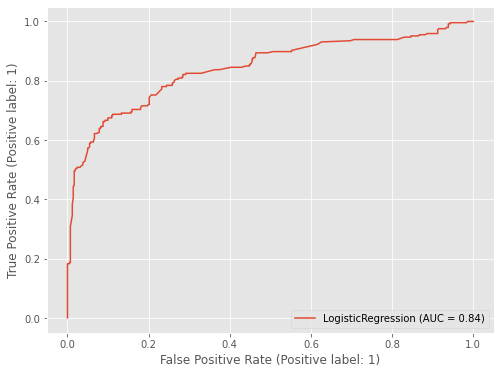

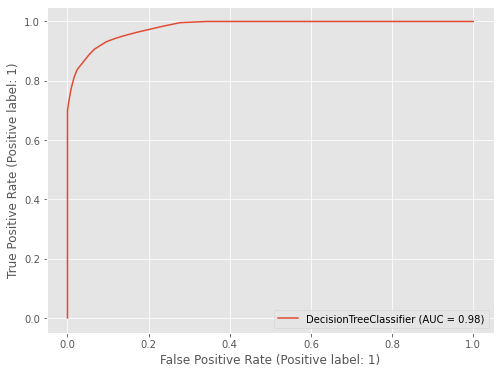

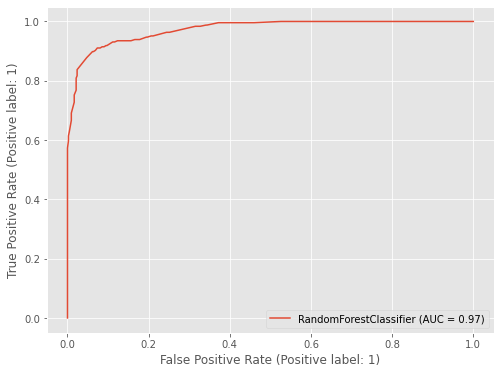

In [326]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc

plot_roc_curve(m_lr, Xtrain_fe, y_train)
plot_roc_curve(m_dt, Xtrain_fe, y_train)  
plot_roc_curve(m_rf, Xtrain_fe, y_train)  

## Trying to add the age as bined categorical data


In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# The Transformers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

# Evaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

In [281]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) 

full_data = pd.read_csv('train.csv', sep=',')

<Figure size 864x576 with 0 Axes>

In [282]:
y = full_data["Survived"]
X = full_data.drop(["Survived"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=100)

In [283]:
df_train = pd.concat([x_train, y_train], axis = 1)
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
225,226,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,0
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,1
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,0
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,0


In [284]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [285]:
x_train = x_train.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket','Embarked'])
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
225,3,male,22.0,0,0,9.3500
856,1,female,45.0,1,1,164.8667
620,3,male,27.0,1,0,14.4542
450,2,male,36.0,1,2,27.7500
423,3,female,28.0,1,1,14.4000


In [286]:
x_train['Family'] = x_train['SibSp'] + x_train['Parch']
x_train = x_train.drop(columns = ['SibSp', 'Parch'])
x_train.head()

,Pclass,Sex,Age,Fare,Family
225,3,male,22.0,9.3500,0
856,1,female,45.0,164.8667,2
620,3,male,27.0,14.4542,1
450,2,male,36.0,27.7500,3
423,3,female,28.0,14.4000,2


In [287]:
y_train.info

<bound method Series.info of 225    0
856    1
620    0
450    0
423    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 668, dtype: int64>

In [288]:
x_train['Age Bin CUT']= pd.qcut(x_train['Age'], 4)
x_train.drop(['Age'], axis = 1)

,Pclass,Sex,Fare,Family,Age Bin CUT
225,3,male,9.3500,0,"(20.0, 28.0]"
856,1,female,164.8667,2,"(39.0, 74.0]"
620,3,male,14.4542,1,"(20.0, 28.0]"
450,2,male,27.7500,3,"(28.0, 39.0]"
423,3,female,14.4000,2,"(20.0, 28.0]"
...,...,...,...,...,...
855,3,female,9.3500,1,"(0.419, 20.0]"
871,1,female,52.5542,2,"(39.0, 74.0]"
835,1,female,83.1583,2,"(28.0, 39.0]"
792,3,female,69.5500,10,NaN


In [289]:
num_col = ['Family', 'Fare', 'Pclass']
cat_col = ['Sex', 'Age Bin CUT']

In [290]:
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
     ('cat_ohe', OneHotEncoder(drop='first'))
])
    
cat_pipeline

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_ohe', OneHotEncoder(drop='first'))])

In [291]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scale',RobustScaler())
])

num_pipeline

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('num_scale', RobustScaler())])

In [292]:
my_column_transformer = ColumnTransformer([
    ("categorical pipeline",cat_pipeline, cat_col),
    ("numerical pipeline", num_pipeline, num_col),
])

my_column_transformer 

ColumnTransformer(transformers=[('categorical pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Sex', 'Age Bin CUT']),
                                ('numerical pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_scale',
                                                  RobustScaler())]),
                                 ['Family', 'Fare', 'Pclass'])])

In [293]:
x_train

,Pclass,Sex,Age,Fare,Family,Age Bin CUT
225,3,male,22.0,9.3500,0,"(20.0, 28.0]"
856,1,female,45.0,164.8667,2,"(39.0, 74.0]"
620,3,male,27.0,14.4542,1,"(20.0, 28.0]"
450,2,male,36.0,27.7500,3,"(28.0, 39.0]"
423,3,female,28.0,14.4000,2,"(20.0, 28.0]"
...,...,...,...,...,...,...
855,3,female,18.0,9.3500,1,"(0.419, 20.0]"
871,1,female,47.0,52.5542,2,"(39.0, 74.0]"
835,1,female,39.0,83.1583,2,"(28.0, 39.0]"
792,3,female,NaN,69.5500,10,NaN


In [294]:
Xtrain_fe= my_column_transformer.fit_transform(x_train)

In [295]:
Xtrain_fe

array([[ 1.        ,  1.        ,  0.        , ...,  0.        ,
        -0.21832227,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.        ,
         6.43360337, -1.6       ],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  2.        ,
         2.93868481, -1.6       ],
       [ 0.        ,  0.        ,  1.        , ..., 10.        ,
         2.35661614,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         3.381031  , -1.6       ]])

In [296]:
x_test = x_test.drop(columns =['PassengerId', 'Name', 'Cabin','Ticket','Embarked'])
x_test['Family'] = x_test['SibSp'] + x_test['Parch']
x_test = x_test.drop(columns = ['SibSp', 'Parch'])
x_test.head()

,Pclass,Sex,Age,Fare,Family
205,3,female,2.0,10.4625,1
44,3,female,19.0,7.8792,0
821,3,male,27.0,8.6625,0
458,2,female,50.0,10.5000,0
795,2,male,39.0,13.0000,0


In [297]:
x_test['Age Bin CUT']= pd.qcut(x_test['Age'], 4)
x_test.drop(['Age'], axis = 1)

,Pclass,Sex,Fare,Family,Age Bin CUT
205,3,female,10.4625,1,"(0.669, 21.0]"
44,3,female,7.8792,0,"(0.669, 21.0]"
821,3,male,8.6625,0,"(21.0, 28.0]"
458,2,female,10.5000,0,"(36.0, 80.0]"
795,2,male,13.0000,0,"(36.0, 80.0]"
...,...,...,...,...,...
153,3,male,14.5000,2,"(36.0, 80.0]"
288,2,male,13.0000,0,"(36.0, 80.0]"
244,3,male,7.2250,0,"(28.0, 36.0]"
680,3,female,8.1375,0,NaN


In [298]:
Xtest_fe= my_column_transformer.transform(x_test)
Xtest_fe

ValueError: Found unknown categories [Interval(21.0, 28.0, closed='right'), Interval(36.0, 80.0, closed='right'), Interval(28.0, 36.0, closed='right'), Interval(0.669, 21.0, closed='right')] in column 1 during transform

In [299]:
m_lr = LogisticRegression()
m_lr.fit(Xtrain_fe, y_train)
y_pred_lr = m_lr.predict(Xtrain_fe)
y_pred_lr

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [300]:
# LogisticRegression model
m_lr = LogisticRegression()
m_lr.fit(Xtrain_fe, y_train)
y_pred_lr = m_lr.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_lr = accuracy_score(y_train, y_pred_lr)
prec_sc_lr = precision_score(y_train,y_pred_lr, zero_division = 0)
rec_sc_lr = recall_score(y_train,y_pred_lr)
f_sc_lr = f1_score(y_train,y_pred_lr, zero_division = 0)


# Evaluation with test data
test_sc_lr = m_lr.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_lr,2)} \n
precision = {round(prec_sc_lr,2)} \n 
recall = {round(rec_sc_lr,2)}\n
f1 = {round(f_sc_lr,2)} \n
test_data = {round(test_sc_lr,2)} \n""")

ValueError: X has 4 features, but LogisticRegression is expecting 7 features as input.

In [301]:
# DesisionTree model
m_dt = DecisionTreeClassifier()
m_dt.fit(Xtrain_fe, y_train)
y_pred_dt = m_dt.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_dt = accuracy_score(y_train, y_pred_dt)
prec_sc_dt = precision_score(y_train,y_pred_dt)
rec_sc_dt = recall_score(y_train,y_pred_dt)
f_sc_dt = f1_score(y_train,y_pred_dt)


# Evaluation with test data
test_sc_dt = m_dt.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_dt,2)} \n
precision = {round(prec_sc_dt,2)} \n 
recall = {round(rec_sc_dt,2)}\n
f1 = {round(f_sc_dt,2)} \n
test_data = {round(test_sc_dt,2)} \n""")

ValueError: X has 4 features, but DecisionTreeClassifier is expecting 7 features as input.

In [257]:
# RandomForest model
m_rf = RandomForestClassifier()
m_rf.fit(Xtrain_fe, y_train)
y_pred_rf = m_rf.predict(Xtrain_fe)

# Evaluation metrics
acc_sc_rf = accuracy_score(y_train, y_pred_rf)
prec_sc_rf = precision_score(y_train,y_pred_rf)
rec_sc_rf = recall_score(y_train,y_pred_rf)
f_sc_rf = f1_score(y_train,y_pred_rf)


# Evaluation with test data
test_sc_rf = m_rf.score(Xtest_fe, y_test)

# printing the results
print(f"""accuracy = {round(acc_sc_rf,2)} \n
precision = {round(prec_sc_rf,2)} \n 
recall = {round(rec_sc_rf,2)}\n
f1 = {round(f_sc_rf,2)} \n
test_data = {round(test_sc_rf,2)} \n""")

ValueError: X has 4 features, but RandomForestClassifier is expecting 7 features as input.